<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Data_Visualization/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [568]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [569]:
%matplotlib inline

In [570]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

In [571]:
data = pd.read_csv('/content/drive/MyDrive/python_OP/Clean_Dataset.csv')

In [572]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [573]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Month,Year,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34


In [574]:
moving_column= data.pop("TotalCost")
data.insert(6,"TotalCost", moving_column)


In [575]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalCost,CustomerID,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010


In [576]:
moving_column= data.pop("InvoiceDate")
data.insert(7,"InvoiceDate", moving_column)

In [577]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalCost,CustomerID,InvoiceDate,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010


# **Tháng có doanh số cao nhất?**

In [578]:
gr_month= data.groupby("Month").sum()["TotalCost"]
gr_month

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalCost, dtype: float64

In [579]:
gr_month.max()

1161817.3799999433

Trực quan totalCost theo month

Text(0, 0.5, 'TotalCost')

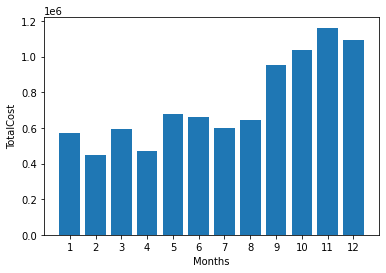

In [580]:
months = range(1,13)
plt.bar(months, gr_month, align='center')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("TotalCost")

#**Country nào có doanh số cao nhất** 

In [581]:
gr_country = data.groupby("Country").sum()["TotalCost"]
gr_country.max()
country = [country for country, totalcost in gr_country.items()]

In [582]:
df= data
df = go.Bar(x = country, y = gr_country,marker={'color': gr_country,'colorscale': 'Viridis'})
layout = go.Layout(title = 'Country')
fig = go.Figure(data=df , layout = layout)
fig.show()

# **Doanh nghiệp nên quảng cáo vào khung giờ nào để tăng doanh thu?**

In [583]:
gr_hour = data.groupby("Hour").count()["TotalCost"]
gr_hour.max()
hour = [hour for hour, totalcost in gr_hour.items()]


Text(0, 0.5, 'TotalCost')

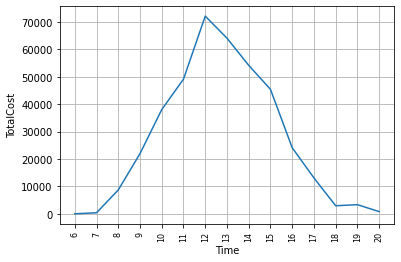

In [584]:
plt.plot(hour, gr_hour)
plt.grid()
plt.xticks(hour, rotation = 90, size=8)
plt.xlabel("Time")
plt.ylabel("TotalCost")


# **Các sản phẩm nào thường được khách hàng mua kèm với nhau**

In [585]:
data.shape

(397924, 14)

In [586]:
data_dup = data[data["InvoiceNo"].duplicated(keep= False)]
data_dup.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalCost,CustomerID,InvoiceDate,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010


In [587]:
gr_product = lambda product: ','.join(product) 
data_dup["All_Products"]= data_dup.groupby("InvoiceNo")["StockCode"].transform(gr_product)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [588]:
data_combo= data_dup[["InvoiceNo","All_Products"]].drop_duplicates()
data_combo.shape

(17144, 2)

In [589]:
data_combo["All_Products"].value_counts()

22632,22633                                                                                                                                                                                   15
85123A,21733                                                                                                                                                                                   5
23552,23498                                                                                                                                                                                    4
84946,22791                                                                                                                                                                                    4
22379,22385,21931,85099B                                                                                                                                                                       4
                                   

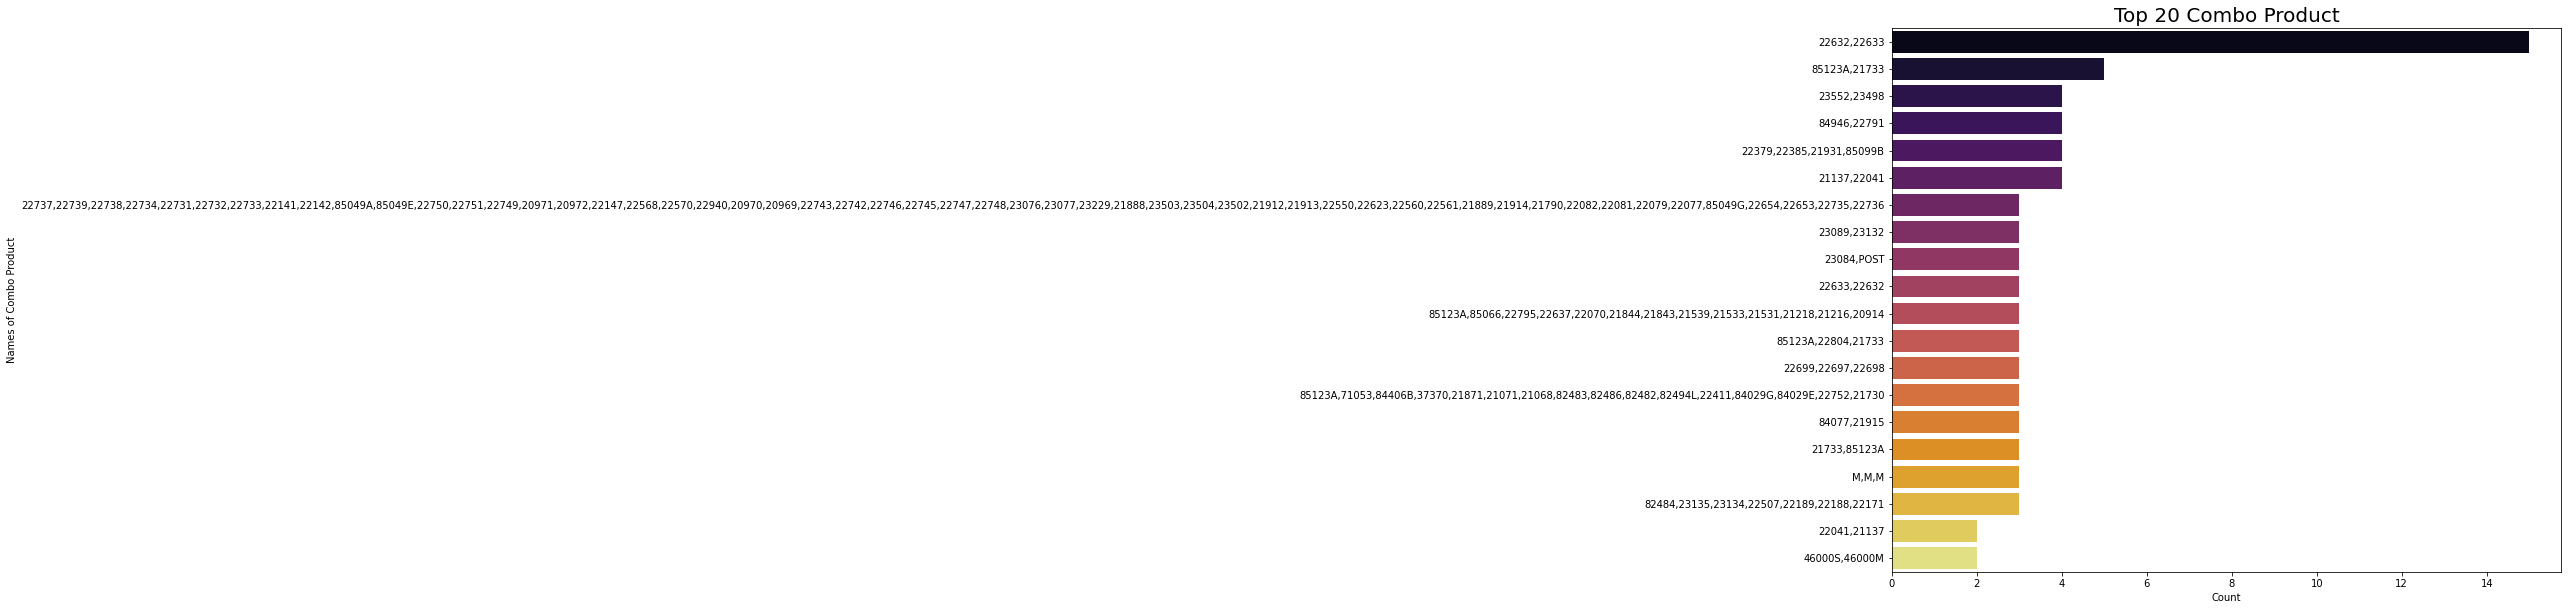

In [590]:
plt.rcParams['figure.figsize'] = (12, 10)
a = data_combo["All_Products"].value_counts().head(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Top 20 Combo Product', fontsize = 20)
plt.ylabel('Names of Combo Product')
plt.xlabel('Count')
plt.show()

In [591]:
data_arr= np.array(data_dup[["StockCode","Description"]])
data_arr
b=[]
for i in data_arr:
  if i[0] == "22632" or i[0]=="22633" :
    if i[1] not in b:
      b.append(i[1])
for i in b:
  print(i)


HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
HAND WARMER RED RETROSPOT


#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [592]:
#tính lần mua gần nhất
data = data_dup
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [593]:
#Tính toán các yếu tố trong mô hình RFM
data['TotalAmount'] = data['UnitPrice']*data['Quantity']

Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,182,4310.00
1,12348.0,75,31,1797.24
2,12349.0,18,73,1757.55
3,12350.0,310,17,334.40
4,12352.0,36,85,2506.04
...,...,...,...,...
4234,18280.0,277,10,180.60
4235,18281.0,180,7,80.82
4236,18282.0,7,12,178.05
4237,18283.0,3,754,2090.43


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



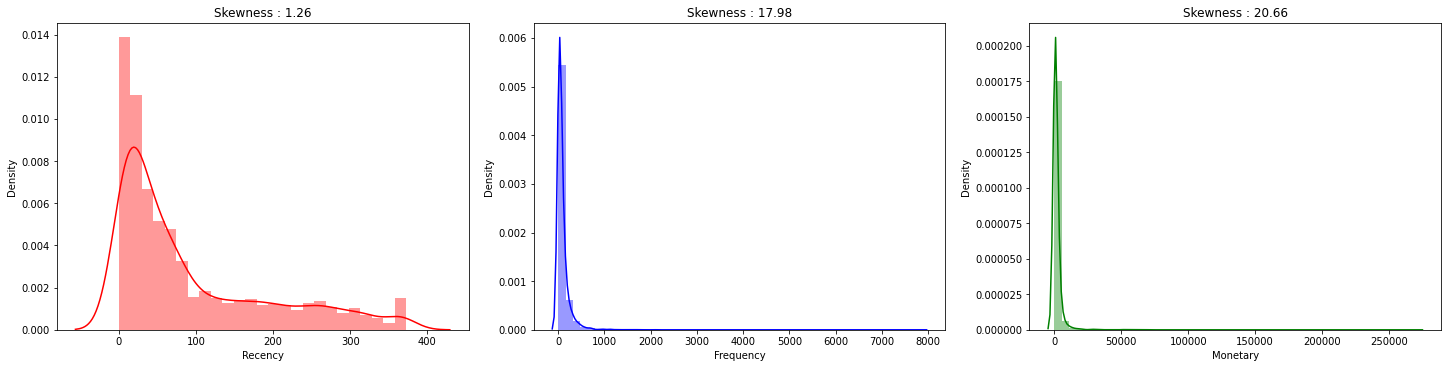

In [594]:
#Trực quan phân phối Recency, Frequency and Monetary.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

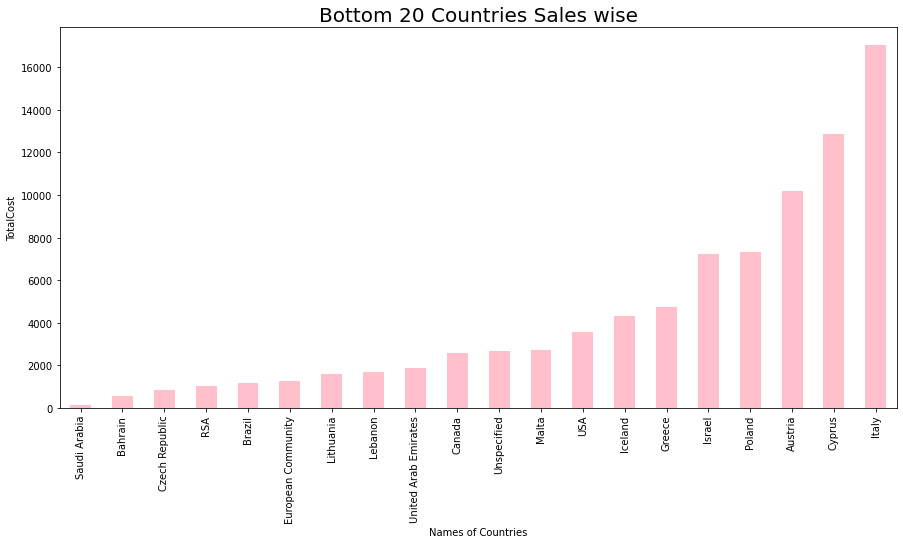

In [595]:
data['TotalCost'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('TotalCost')
plt.show()

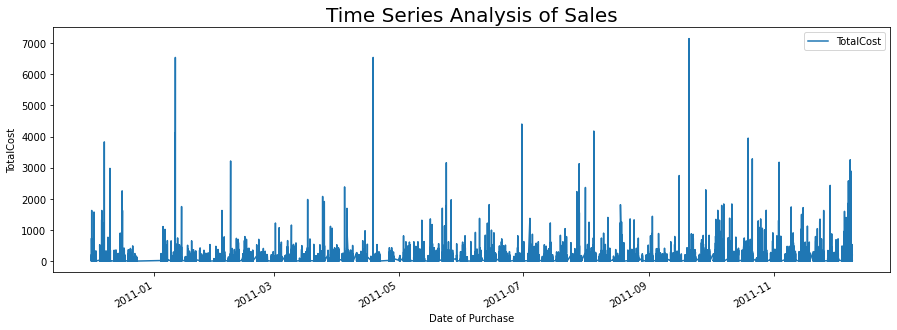

In [596]:
plt.rcParams['figure.figsize'] = (15, 5)
data.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost')
plt.show()

Thời gian mua hàng 

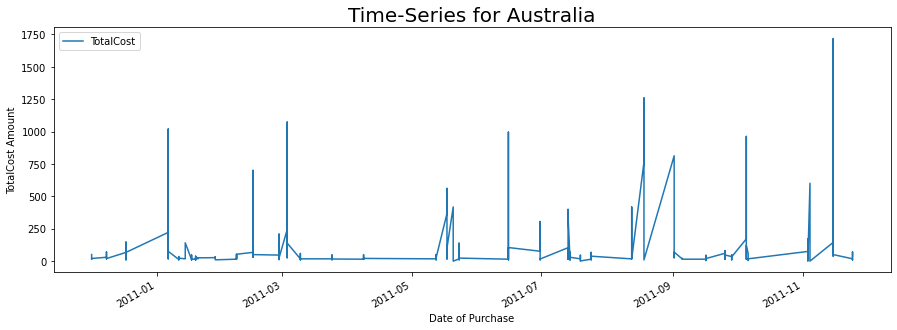

In [597]:
# time-series plot for Australia

dataset = data[data['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost Amount')
plt.show()

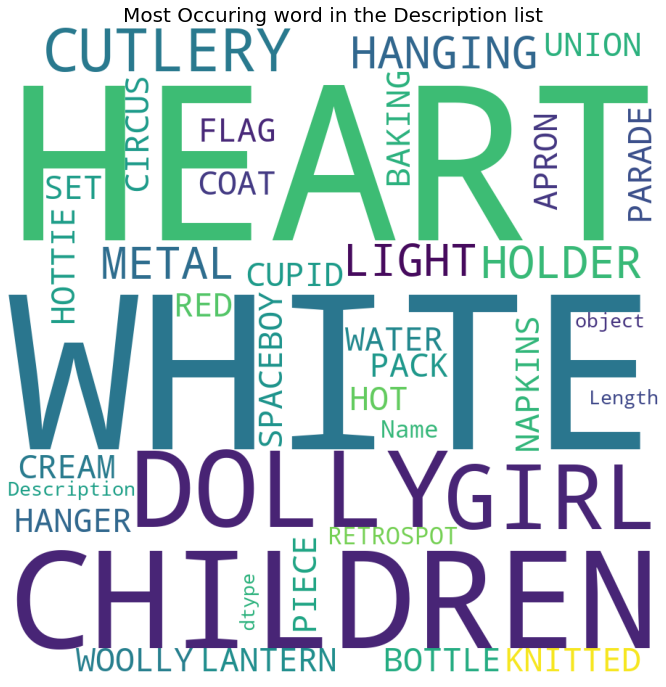

In [598]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [599]:
data = [go.Bar(x = data['Country'].unique(), y = data['Country'].value_counts(),marker={'color': data['Country'].value_counts(),'colorscale': 'Viridis'})]
layout = go.Layout(title = 'Country')
fig = go.Figure(data = data, layout = layout)
fig.show()